<a href="https://colab.research.google.com/github/Santiagoc126/TareasCursos20B/blob/main/Tareas_secci%C3%B3n_2_3_6_y_2_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 5 sección 2.3.6

In [65]:
#Definiendo las matrices de Pauli
sigma0= Matrix([[1,0],[0,1]])
sigma1= Matrix([[0,1],[1,0]])
sigma2= Matrix([[0,-I],[I,0]])
sigma3= Matrix([[1,0],[0,-1]])

base_M= [sigma0,sigma1,sigma2,sigma3]

#a) Verificando que son base
vectores= [m.vec() for m in base_M] #Volviendo las matrices como vectores columna
M= Matrix.hstack(*vectores)

rango= M.rank()
if rango==4:
  print("Las matrices de Pauli son linealmente independientes, y como el rango es 4, automáticamente son base de las matrices 2x2, ya que estas tienen dimensión 4")
else:
  print("Las matrices de Pauli no son base")

#b) Comprobando que son ortogonales
#Definiendo el producto interno
def producto_matrices(A,B):
  return (A.H*B).trace()
ortogonales= True
for i, v in enumerate(base_M):
  for j, u in enumerate(base_M):
    if j > i:
      resultado= producto_matrices(v, u)
      if resultado !=0:
        ortogonales= False
if ortogonales:
  print("Las matrices de Pauli son ortogonales")
else:
  print("Las matrices de Pauli no son ortogonales")

#c) Explorando la posible construcción de matrices imaginarias y reales puras
#Las hermíticas 2x2 tienen la siguiente forma con a,b,c,d reales:
a,b,c,d = symbols("a b c d", real=True)
H = Matrix([[a, c+I*d],[c-I*d, b]])

print("\nForma general de una matriz hermítica 2x2:")
pprint(H)

# Subespacio de matrices reales -> d=0
H_real = H.subs(d,0)

print("\nSubespacio real (d=0):")
pprint(H_real)

# Subespacio puramente imaginario -> a=b=c=0
H_imag = H.subs({a:0, b:0, c:0})

print("\nSubespacio imaginario puro (solo depende de d):")
pprint(H_imag)

#Por lo tanto, si se consideran s,t,k y r escalares reales, entonces:
s,t,k,r = symbols("s t k r", real=True)

#Combinación lineal real que representa matrices hermíticas reales
H_real_combinacion = s*sigma0 + t*sigma1 + k*sigma3

print("\nCualquier matriz hermítica real 2x2 puede escribirse como combinación lineal real de:")
print("s·σ₀ + t·σ₁ + k·σ₃")
pprint(H_real_combinacion)

#Combinación lineal real que representa matrices hermíticas puramente imaginarias
H_imag_combinacion = r * sigma2

print("\nCualquier matriz hermítica puramente imaginaria 2x2 puede escribirse como combinación lineal real de:")
print("r·σ₂")
pprint(H_imag_combinacion)

print("Conclusión:")
print("Las matrices hermíticas reales forman un subespacio generado por {σ₀, σ₁, σ₃} (dimensión 3).")
print("Las matrices hermíticas puramente imaginarias forman un subespacio generado por {σ₂} (dimensión 1).")
print("Ambos son subespacios del espacio de matrices hermíticas 2x2 si trabajamos sobre el cuerpo de los reales.")

Las matrices de Pauli son linealmente independientes, y como el rango es 4, automáticamente son base de las matrices 2x2, ya que estas tienen dimensión 4
Las matrices de Pauli son ortogonales

Forma general de una matriz hermítica 2x2:
⎡   a     c + ⅈ⋅d⎤
⎢                ⎥
⎣c - ⅈ⋅d     b   ⎦

Subespacio real (d=0):
⎡a  c⎤
⎢    ⎥
⎣c  b⎦

Subespacio imaginario puro (solo depende de d):
⎡ 0    ⅈ⋅d⎤
⎢         ⎥
⎣-ⅈ⋅d   0 ⎦

Cualquier matriz hermítica real 2x2 puede escribirse como combinación lineal real de:
s·σ₀ + t·σ₁ + k·σ₃
⎡k + s    t   ⎤
⎢             ⎥
⎣  t    -k + s⎦

Cualquier matriz hermítica puramente imaginaria 2x2 puede escribirse como combinación lineal real de:
r·σ₂
⎡ 0   -ⅈ⋅r⎤
⎢         ⎥
⎣ⅈ⋅r   0  ⎦
Conclusión:
Las matrices hermíticas reales forman un subespacio generado por {σ₀, σ₁, σ₃} (dimensión 3).
Las matrices hermíticas puramente imaginarias forman un subespacio generado por {σ₂} (dimensión 1).
Ambos son subespacios del espacio de matrices hermíticas 2x2 si trabajamos

Ejercicio 6 sección 2.3.6

In [4]:
import sympy
from sympy import *
import mpmath as mp
t= symbols("t")
a,b=-1,1
#Definiendo el producto interno usando integración numérica para mayor velocidad, se aplicará lo mismo en el resto de ejercicios
def producto_interno_1(f, g):
    h = simplify(f*g*sqrt(1 - t**2))
    f_num = lambdify(t, h, "mpmath")
    return mp.quad(f_num, [a, b])
#Definiendo la base para la construcción de los polinomios de Chebyshev de segunda especie
base_1= [t**i for i in range(7)]
#Realizando Gram-Schmidt
ortogonalizados= []
for v in base_1:
  u=v
  for o in ortogonalizados:
    u -= (producto_interno_1(u,o)/producto_interno_1(o,o))*o
  ortogonalizados.append(u)
#Comprobadno que si son ortogonales
e1= ortogonalizados[0]
e2= ortogonalizados[1]
e3= ortogonalizados[2]
e4= ortogonalizados[3]
e5= ortogonalizados[4]
e6= ortogonalizados[5]
e7= ortogonalizados[6]
vectores_ortogonales= [e1,e2,e3,e4,e5,e6,e7]
ortogonales= True
for i, vi in enumerate(vectores_ortogonales):
  for j, vj in enumerate(vectores_ortogonales):
    if j>i:
      resultado= producto_interno_1(vi,vj)
      if resultado !=0:
        ortogonales= False
if ortogonales:
  print("Los vectores de la base son ortogonales")
else:
  print("Los vectores de la base no son ortogonales")
print("Los polinomios de Chebyshev de segunda especie son:")
FiniteSet(*ortogonalizados)

Los vectores de la base no son ortogonales
Los polinomios de Chebyshev de segunda especie son:


{1, t, t**2 - 0.25, t**3 - 0.5*t, t**4 - 0.75*t**2 + 0.0625, t**5 - 1.0*t**3 + 0.1875*t, t**6 - 1.25*t**4 + 0.375*t**2 - 0.015625}

Ejercicio 3 sección 2.4.5

In [15]:
#a) Mostrando que la base no es ortogonal
x= symbols("x")
a,b= -1,1
#Definiendo el producto interno
def producto_interno(f,g):
    h = simplify(f*g)
    f_num = lambdify(x, h, "mpmath")
    return mp.quad(f_num, [a, b])
#Definiendo la base oblícua
base= [x**i for i in range(11)]
#Verificando que es ortogonal
ortogonales= True
for i, vi, in enumerate(base):
  for j, vj in enumerate(base):
    if j>i:
      resultado= producto_interno(vi,vj)
      if resultado !=0:
        ortogonales= False
if ortogonales:
  print("La base es ortogonal")
else:
  print("La base es oblícua")

La base es oblícua


In [16]:
#b) Obteniendo los primeros 10 polinomios de Legendre
#Realizando Gram-Schmidt
base_legendre= []
for v in base:
  u=v
  for o in base_legendre:
    u -= (producto_interno(u,o)/producto_interno(o,o))*o
  base_legendre.append(u)
print("La base de polinomios de Legendre es:")
FiniteSet(*base_legendre)

La base de polinomios de Legendre es:


{1, x, x**2 - 0.333333333333333, x**3 - 0.6*x, x**4 - 0.857142857142857*x**2 + 0.0857142857142857, x**5 - 1.11111111111111*x**3 + 0.238095238095238*x, x**6 - 1.36363636363636*x**4 + 0.454545454545455*x**2 - 0.0216450216450216, x**7 - 1.61538461538462*x**5 + 0.734265734265734*x**3 - 0.0815850815850817*x, x**8 - 1.86666666666667*x**6 + 1.07692307692308*x**4 - 0.195804195804196*x**2 + 0.00543900543900546, x**9 - 2.11764705882353*x**7 + 1.48235294117647*x**5 - 0.380090497737556*x**3 + 0.0259152612093788*x, x**10 - 2.36842105263158*x**8 + 1.95046439628483*x**6 - 0.650154798761609*x**4 + 0.0750178613955705*x**2 - 0.00136396111628314}

In [17]:
#c) Obteniendo los 10 primeros polinomios de Chebyshev
#Definiendo el producto interno para Chebyshev
def producto_chebyshev(f, g):
    h = simplify(f*g*sqrt(1 - x**2))
    f_num = lambdify(x, h, "mpmath")
    return mp.quad(f_num, [a, b])

#Realizando Gram–Schmidt
base_chebyshev = []
for v in base:
    u = v
    for o in base_chebyshev:
        u -= (producto_chebyshev(u, o) / producto_chebyshev(o, o)) * o
    base_chebyshev.append(expand(u))
print("La base de polinomios de Chebyshev es:")
FiniteSet(*base_chebyshev)

La base de polinomios de Chebyshev es:


{1, x, x**2 - 0.25, x**3 - 0.5*x, x**4 - 0.75*x**2 + 0.0625, x**5 - 1.0*x**3 + 0.1875*x, x**6 - 1.25*x**4 + 0.375*x**2 - 0.015625, x**7 - 1.5*x**5 + 0.625*x**3 - 0.0625*x, x**8 - 1.75*x**6 + 0.9375*x**4 - 0.15625*x**2 + 0.00390625, x**9 - 2.0*x**7 + 1.3125*x**5 - 0.3125*x**3 + 0.01953125*x, x**10 - 2.25*x**8 + 1.75*x**6 - 0.546874999999999*x**4 + 0.0585937499999998*x**2 - 0.000976562499999993}

Expansión de la función en las distintas bases

In [26]:
#d) Expandiendo la función en términos de las distintas bases
#Función a expandir
f = sin(3*x)*(1 - x**2)
f_num = lambdify(x, f, "mpmath")
base= [x**i for i in range(11)]

def expansion_monomios(f, base):
  m = len(base)
  #Matriz de Gram
  G = Matrix([[producto_interno(phi, psi) for psi in base] for phi in base])
  b = Matrix([producto_interno(f, phi) for phi in base])
  C = G.LUsolve(b)
  f_aprox = sum(C[j]*base[j] for j in range(m))
  return C, simplify(f_aprox)

def expansion_monomios(f, base):
    m = len(base)
    # Matriz de Gram
    G = Matrix([[producto_interno(base[i], base[j]) for j in range(m)] for i in range(m)])
    # Vector b
    b = Matrix([producto_interno(f, base[i]) for i in range(m)])
    # Resolver sistema: preferimos Cholesky (Gram debería ser PD)
    C = G.LUsolve(b)
   # Construcción de la aproximación
    f_aprox = sum(C[j]*base[j] for j in range(m))
    return C, simplify(f_aprox)

#Expansión para las demás bases, sacando provecho de que las bases son ortogonales, por tanto, no es necesario el sistema de ecuaciones en el ejercicio anterior
def expansion_orto(f, base, prod):
    coefs = []
    for e in base:
        c = prod(f, e) / prod(e, e)
        coefs.append(c)
    f_aprox = sum(coefs[j]*base[j] for j in range(len(base)))
    return coefs, f_aprox

# Expansiones
C_mono, f_mono = expansion_monomios(f, base)
C_leg, f_leg = expansion_orto(f, base_legendre, producto_interno)
C_cheb, f_cheb = expansion_orto(f, base_chebyshev, producto_chebyshev)

C_mono = [float(c) for c in C_mono]
C_leg = [float(c) for c in C_leg]
C_cheb = [float(c) for c in C_cheb]

print("\nCoeficientes en monomios:\n", C_mono)
print("\nAproximación con monomios:\nf(x)=", f_mono)
print("\nCoeficientes Legendre:\n", C_leg)
print("\nAproximación Legendre:\nf(x)=", f_leg)
print("\nCoeficientes Chebyshev:\n", C_cheb)
print("\nAproximación Chebyshev:\nf(x)=", f_cheb)


Coeficientes en monomios:
 [0.0, 2.9996330582147466, 0.0, -7.491973483743504, 0.0, 6.476147812861834, 0.0, -2.3374357922925446, 0.0, 0.35375769176883426, 0.0]

Aproximación con monomios:
f(x)= x*(0.353757691768834*x**8 - 2.33743579229254*x**6 + 6.47614781286183*x**4 - 7.4919734837435*x**2 + 2.99963305821475)

Coeficientes Legendre:
 [0.0, 0.5972749941514671, 0.0, -2.429016057526071, 0.0, 3.3860356739719006, 0.0, -1.5883018567825329, 0.0, 0.353757691772543, 0.0]

Aproximación Legendre:
f(x)= 0.353757691772543*x**9 - 2.33743579230086*x**7 + 6.47614781286805*x**5 - 7.49197348374522*x**3 + 2.99963305821487*x

Coeficientes Chebyshev:
 [0.0, 0.8241672593473378, 0.0, -2.7957594487492776, 0.0, 3.566994442104941, 0.0, -1.6296095131536414, 0.0, 0.359153673655444, 0.0]

Aproximación Chebyshev:
f(x)= 0.359153673655444*x**9 - 2.34791686046453*x**7 + 6.48279790850817*x**5 - 7.49349535959257*x**3 + 2.99972375637734*x


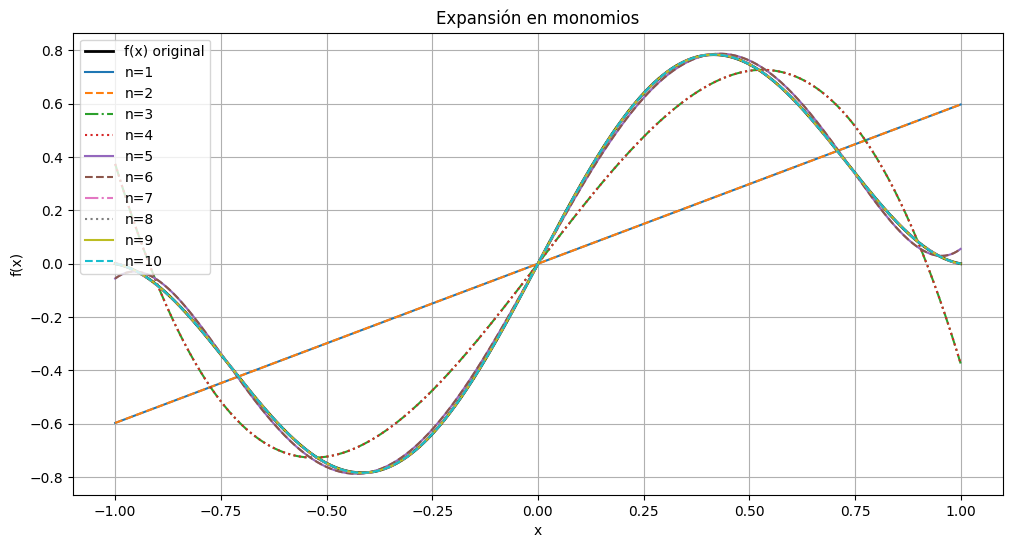

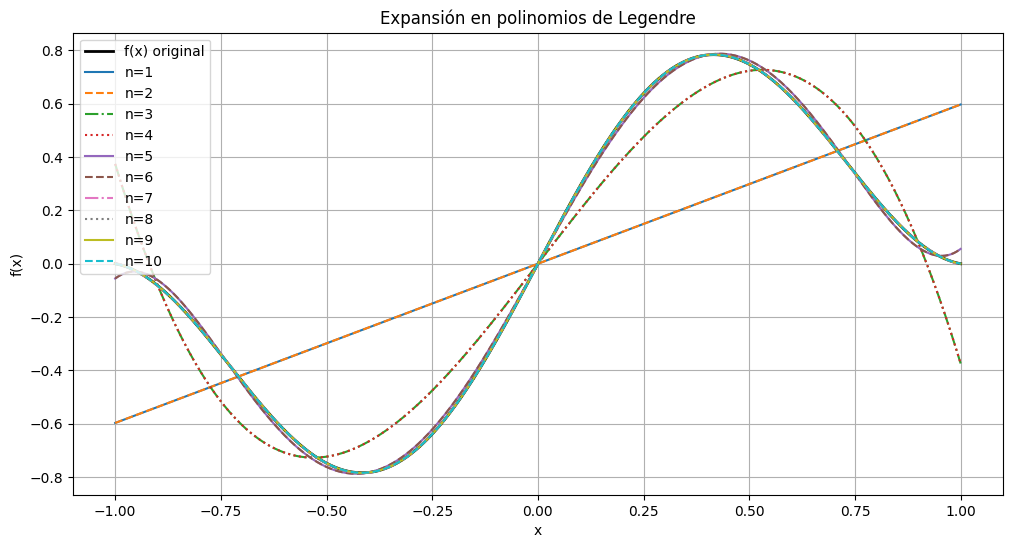

Las expansiones coinciden para todos los grados.


In [31]:
#d. I) Comparando la base de monomios con la de Legendre
import numpy as np
import matplotlib.pyplot as plt

#Función a graficar
f_np = lambdify(x, f, "numpy")
xx = np.linspace(-1, 1, 600)

#Gráfica con monomios
plt.figure(figsize=(12,6))
plt.plot(xx, f_np(xx), "k", linewidth=2, label="f(x) original")

#Estilos de línea y paleta de colores
linestyles = ['-', '--', '-.', ':']
colors = plt.cm.tab10(np.linspace(0,1,10))

for n in range(1, 11):
    bm = base[:n+1]
    C_mono, f_mono = expansion_monomios(f, bm)
    f_mono_np = lambdify(x, f_mono, "numpy")
    plt.plot(xx, f_mono_np(xx),
             linestyle=linestyles[(n-1)%len(linestyles)],
             color=colors[n-1],
             label=f"n={n}")

plt.title("Expansión en monomios")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.grid(True); plt.legend()
plt.show()

#Gráfica con Legendre
plt.figure(figsize=(12,6))
plt.plot(xx, f_np(xx), "k", linewidth=2, label="f(x) original")

for n in range(1, 11):
    bl = base_legendre[:n+1]
    C_leg, f_leg = expansion_orto(f, bl, producto_interno)
    f_leg_np = lambdify(x, f_leg, "numpy")
    plt.plot(xx, f_leg_np(xx),
             linestyle=linestyles[(n-1)%len(linestyles)],
             color=colors[n-1],
             label=f"n={n}")

plt.title("Expansión en polinomios de Legendre")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.grid(True); plt.legend()
plt.show()

#Comparación de aproximaciones
tol = 1e-6  # tolerancia numérica
grado_diferente = None

for n in range(1, 11):
    bm = base[:n+1]
    bl = base_legendre[:n+1]
    _, f_mono = expansion_monomios(f, bm)
    _, f_leg = expansion_orto(f, bl, producto_interno)

    f_mono_np = lambdify(x, f_mono, "numpy")
    f_leg_np = lambdify(x, f_leg, "numpy")

    diff = np.max(np.abs(f_mono_np(xx) - f_leg_np(xx)))

    if diff > tol:
        grado_diferente = n
        break

if grado_diferente is None:
    print("Las expansiones coinciden para todos los grados.")
else:
    print(f"Las expansiones empiezan a diferir a partir de n={grado_diferente}")

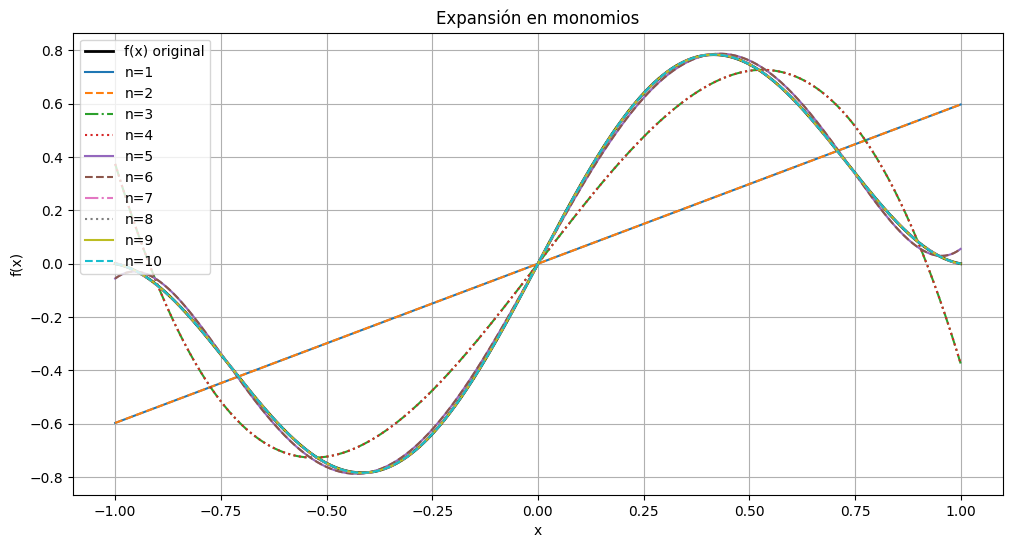

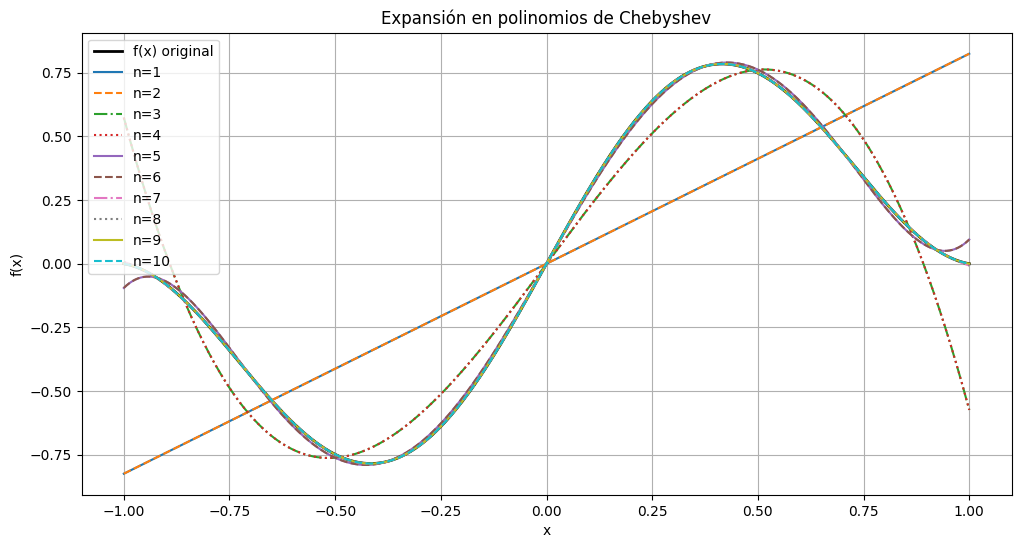

Las expansiones empiezan a diferir a partir de n=1


In [30]:
#d. II) Comparando la base de monomios con la de Chebyshev
#Gráfica con monomios
plt.figure(figsize=(12,6))
plt.plot(xx, f_np(xx), "k", linewidth=2, label="f(x) original")

#Estilos de línea y paleta de colores
linestyles = ['-', '--', '-.', ':']
colors = plt.cm.tab10(np.linspace(0,1,10))

for n in range(1, 11):
    bm = base[:n+1]
    C_mono, f_mono = expansion_monomios(f, bm)
    f_mono_np = lambdify(x, f_mono, "numpy")
    plt.plot(xx, f_mono_np(xx),
             linestyle=linestyles[(n-1)%len(linestyles)],
             color=colors[n-1],
             label=f"n={n}")

plt.title("Expansión en monomios")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.grid(True); plt.legend()
plt.show()

#Gráfica con Chebyshev
plt.figure(figsize=(12,6))
plt.plot(xx, f_np(xx), "k", linewidth=2, label="f(x) original")

for n in range(1, 11):
    bc = base_chebyshev[:n+1]
    C_che, f_che = expansion_orto(f, bc, producto_chebyshev)
    f_che_np = lambdify(x, f_che, "numpy")
    plt.plot(xx, f_che_np(xx),
             linestyle=linestyles[(n-1)%len(linestyles)],
             color=colors[n-1],
             label=f"n={n}")

plt.title("Expansión en polinomios de Chebyshev")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.grid(True); plt.legend()
plt.show()

#Comparación de aproximaciones
tol = 1e-6  # tolerancia numérica
grado_diferente = None

for n in range(1, 11):
    bm = base[:n+1]
    bc = base_chebyshev[:n+1]
    _, f_mono = expansion_monomios(f, bm)
    _, f_che= expansion_orto(f, bc, producto_chebyshev)

    f_mono_np = lambdify(x, f_mono, "numpy")
    f_che_np = lambdify(x, f_che, "numpy")

    diff = np.max(np.abs(f_mono_np(xx) - f_che_np(xx)))

    if diff > tol:
        grado_diferente = n
        break

if grado_diferente is None:
    print("Las expansiones coinciden para todos los grados.")
else:
    print(f"Las expansiones empiezan a diferir a partir de n={grado_diferente}")

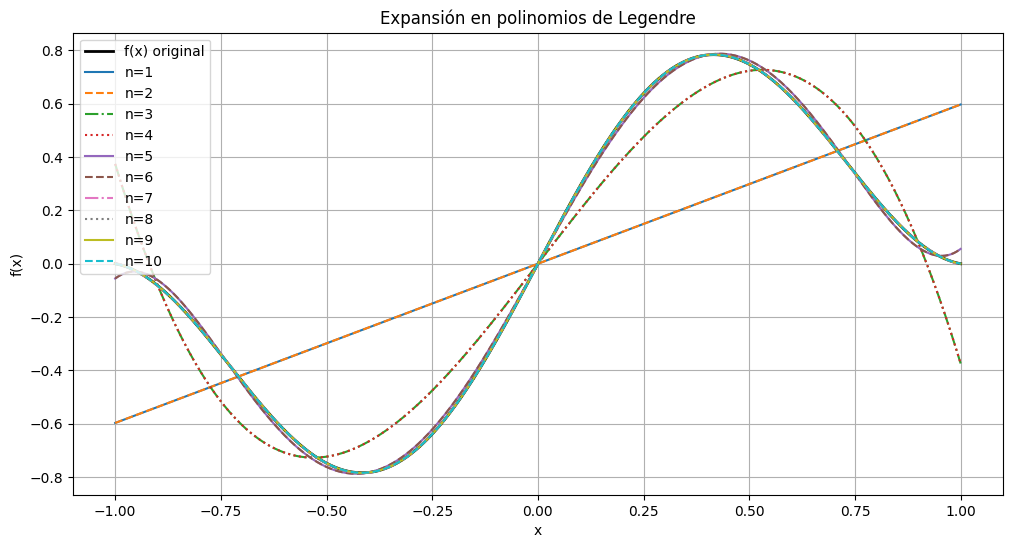

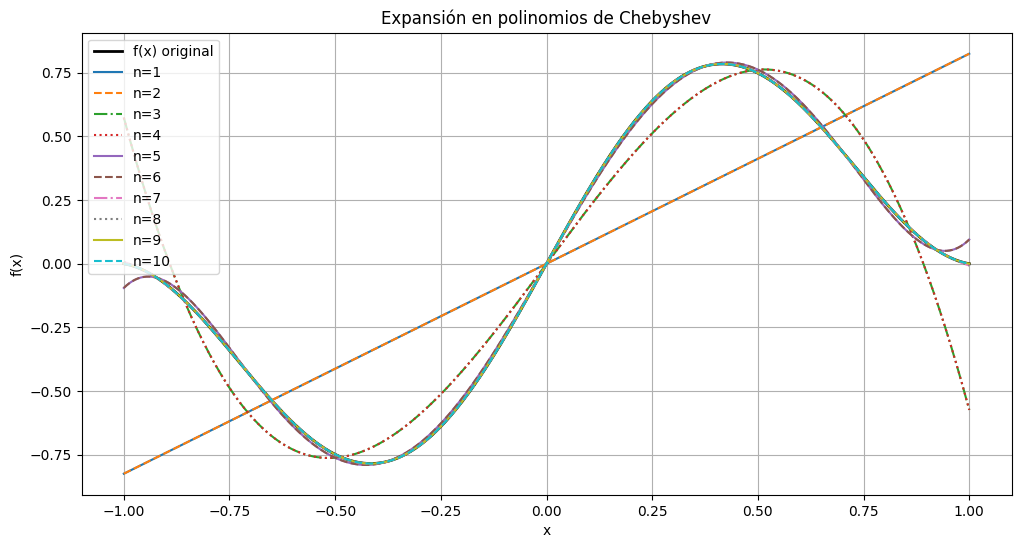

Las expansiones empiezan a diferir a partir de n=1


In [32]:
#d. III) Comparando la base de Legendre con la de Chebyshev
#Estilos de línea y paleta de colores
linestyles = ['-', '--', '-.', ':']
colors = plt.cm.tab10(np.linspace(0,1,10))

#Gráfica con Legendre
plt.figure(figsize=(12,6))
plt.plot(xx, f_np(xx), "k", linewidth=2, label="f(x) original")

for n in range(1, 11):
    bl = base_legendre[:n+1]
    C_leg, f_leg = expansion_orto(f, bl, producto_interno)
    f_leg_np = lambdify(x, f_leg, "numpy")
    plt.plot(xx, f_leg_np(xx),
             linestyle=linestyles[(n-1)%len(linestyles)],
             color=colors[n-1],
             label=f"n={n}")

plt.title("Expansión en polinomios de Legendre")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.grid(True); plt.legend()
plt.show()

#Gráfica con Chebyshev
plt.figure(figsize=(12,6))
plt.plot(xx, f_np(xx), "k", linewidth=2, label="f(x) original")

for n in range(1, 11):
    bc = base_chebyshev[:n+1]
    C_che, f_che = expansion_orto(f, bc, producto_chebyshev)
    f_che_np = lambdify(x, f_che, "numpy")
    plt.plot(xx, f_che_np(xx),
             linestyle=linestyles[(n-1)%len(linestyles)],
             color=colors[n-1],
             label=f"n={n}")

plt.title("Expansión en polinomios de Chebyshev")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.grid(True); plt.legend()
plt.show()

#Comparación de aproximaciones
tol = 1e-6  # tolerancia numérica
grado_diferente = None

for n in range(1, 11):
    bl = base_legendre[:n+1]
    bc = base_chebyshev[:n+1]
    _, f_leg = expansion_monomios(f, bl)
    _, f_che= expansion_orto(f, bc, producto_chebyshev)

    f_leg_np = lambdify(x, f_leg, "numpy")
    f_che_np = lambdify(x, f_che, "numpy")

    diff = np.max(np.abs(f_leg_np(xx) - f_che_np(xx)))

    if diff > tol:
        grado_diferente = n
        break

if grado_diferente is None:
    print("Las expansiones coinciden para todos los grados.")
else:
    print(f"Las expansiones empiezan a diferir a partir de n={grado_diferente}")

Error de la función obtenida respecto a la original

In [36]:
#d. IV) Encontrando errores
#Definiendo distancias
def error_1(f,f_aprox):
  resta= f-f_aprox
  error= sqrt(producto_interno(resta,resta))
  return error
def error_2(f,f_aprox):
  resta= f-f_aprox
  error= sqrt(producto_chebyshev(resta,resta))
  return error

#Lista para guardar errores
errores_mono= []
errores_leg= []
errores_cheb= []
mejores=[]

for n in range(1, 11):
    # Bases
    bm = base[:n+1]
    bl = base_legendre[:n+1]
    bc = base_chebyshev[:n+1]

    #Aproximaciones
    _, f_mono = expansion_monomios(f, bm)
    _, f_leg  = expansion_orto(f, bl, producto_interno)
    _, f_cheb = expansion_orto(f, bc, producto_chebyshev)

    #Errores
    e_mono = error_1(f, f_mono)
    e_leg  = error_1(f, f_leg)
    e_cheb = error_2(f, f_cheb)

    errores_mono.append(e_mono)
    errores_leg.append(e_leg)
    errores_cheb.append(e_cheb)

    #Comparación en cada grado
    errores = {
        "Monomios": e_mono,
        "Legendre": e_leg,
        "Chebyshev": e_cheb
    }
    mejor = min(errores, key=errores.get)
    mejores.append(mejor)

for n in range(1, 11):
    print(f"\nn={n}")
    print(f"  Error Monomios : {errores_mono[n-1]}")
    print(f"  Error Legendre : {errores_leg[n-1]}")
    print(f"  Error Chebyshev: {errores_cheb[n-1]}")
    print(f"  → Mejor aproximación: {mejores[n-1]}")


n=1
  Error Monomios : 0.551183263684551
  Error Legendre : 0.551183263684551
  Error Chebyshev: 0.460014190898635
  → Mejor aproximación: Chebyshev

n=2
  Error Monomios : 0.551183263684551
  Error Legendre : 0.551183263684551
  Error Chebyshev: 0.460014190898635
  → Mejor aproximación: Chebyshev

n=3
  Error Monomios : 0.184616532571643
  Error Legendre : 0.184616532571643
  Error Chebyshev: 0.140616164248788
  → Mejor aproximación: Chebyshev

n=4
  Error Monomios : 0.184616532571643
  Error Legendre : 0.184616532571643
  Error Chebyshev: 0.140616164248788
  → Mejor aproximación: Chebyshev

n=5
  Error Monomios : 0.0216642040981283
  Error Legendre : 0.0216642040981283
  Error Chebyshev: 0.0159805753805878
  → Mejor aproximación: Chebyshev

n=6
  Error Monomios : 0.0216642040981283
  Error Legendre : 0.0216642040981283
  Error Chebyshev: 0.0159805753805878
  → Mejor aproximación: Chebyshev

n=7
  Error Monomios : 0.00120927514295581
  Error Legendre : 0.00120927514295581
  Error Che